In [24]:
#Import neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
print("Imported neccessary modules!")

Imported neccessary modules!


In [4]:
#Read the dataset
df = pd.read_csv('C:/Users/14086/Desktop/bmw.csv')
print(df.head())
print(df.info())

       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 

In [6]:
#Create the X and y arrays
X = np.array(df.drop('price', axis=1))
y = np.array(df['price'])
print(X.shape)
print(y.shape)

(10781, 8)
(10781,)


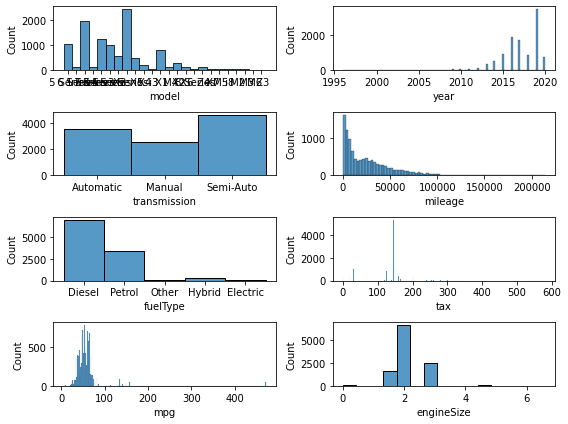

In [20]:
#Create a visualization of the attributes(Everything excluding the price, as that is the target)
atr_columns = [col for col in df.columns if col != 'price']
rows = 4
columns = 2
atr = 0
fig, ax = plt.subplots(rows, columns, figsize=(8,6))
for i in range(rows):
    for j in range(columns):
        sns.histplot(ax=ax[i][j], x=X[:,atr])
        ax[i][j].set_xlabel(atr_columns[atr])
        atr += 1
fig.tight_layout()
plt.show()

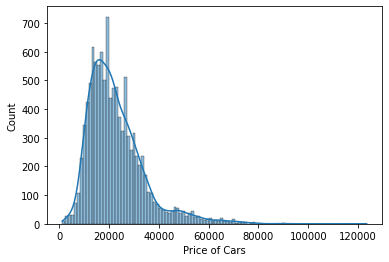

In [21]:
#Visualize the target variable(the price of the car)
sns.histplot(x=y, kde=True)
plt.xlabel('Price of Cars')
plt.show()

In [27]:
#Remove strings from the X array by converting them to integers
for i in range(X.shape[1]):
    if isinstance(X[:,i][0], str):
        X[:,i] = LabelEncoder().fit_transform(X[:,i])
print(X)

[[4 2014 0 ... 125 57.6 2.0]
 [5 2018 0 ... 145 42.8 2.0]
 [4 2016 0 ... 160 51.4 3.0]
 ...
 [2 2017 1 ... 200 42.8 2.0]
 [0 2014 0 ... 30 64.2 2.0]
 [13 2017 0 ... 125 57.6 2.0]]


In [28]:
#Split the X and y variables into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8085, 8)
(2696, 8)
(8085,)
(2696,)


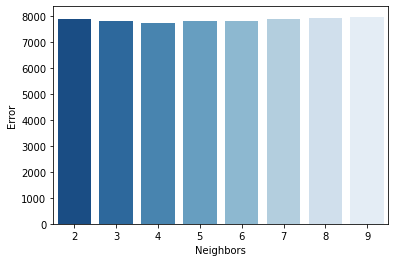

In [37]:
#Test the model for various neighbors to find the best model
def regressor_accuracy(neighbors):
    model = KNeighborsRegressor(n_neighbors=neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_pred, y_test))
    return error

all_neighbors = [n for n in range(2, 10)]
accuracies = [regressor_accuracy(n) for n in all_neighbors]
sns.barplot(x=all_neighbors, y=accuracies, palette='Blues_r')
plt.xlabel("Neighbors")
plt.ylabel("Error")
plt.show()

In [39]:
#From the graph, it is clear n_neighbors of 4 is the most accurate. Find the exact error of the model with 4
print(accuracies[2])

7729.845788353159
